## **Plottable**

_Serie A 2023/24_

In [56]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from highlight_text import fig_text

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from PIL import Image
import urllib

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [57]:
# read data from fbref
serieA = pd.read_html('https://fbref.com/en/comps/11/Serie-A-Stats', attrs={'id': "results2023-2024111_overall"})[0]

print(serieA.shape)
print('')
print(serieA.columns)
print('')
serieA.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Inter,33,27,5,1,79,18,61,86,2.61,68.3,24.7,43.6,1.32,D W W D W,42849,Lautaro Martínez - 23,Yann Sommer,NaN
1,2,Milan,33,21,6,6,64,39,25,69,2.09,52.9,37.4,15.5,0.47,W W W D L,44918,Olivier Giroud - 13,Mike Maignan,NaN
2,3,Juventus,33,18,10,5,47,26,21,64,1.94,48.1,25.2,22.9,0.69,D L W D D,22303,Dušan Vlahović - 16,Wojciech Szczęsny,NaN
3,4,Bologna,33,17,11,5,48,26,22,62,1.88,43.2,31.9,11.3,0.34,W W D D W,14923,Joshua Zirkzee - 11,Łukasz Skorupski,NaN
4,5,Roma,32,16,7,9,57,38,19,55,1.72,43.3,31.2,12.1,0.38,D W D W L,40029,Paulo Dybala - 12,Rui Patrício,NaN


In [58]:
# read and insert Club's badges
serieA['badge'] = serieA['Squad'].apply(
    lambda x: f"../../logos/SerieA/{x.lower()}.png"
)

In [59]:
# data cleaning
serieA[['xG', 'xGA', 'xGD', 'xGD/90']] = serieA[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

serieA = serieA[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [60]:
# set up the colors
bg_color = "#ffffff"
text_color = "#000000"

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [61]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieA["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

(-0.5, 191.5, 191.5, -0.5)

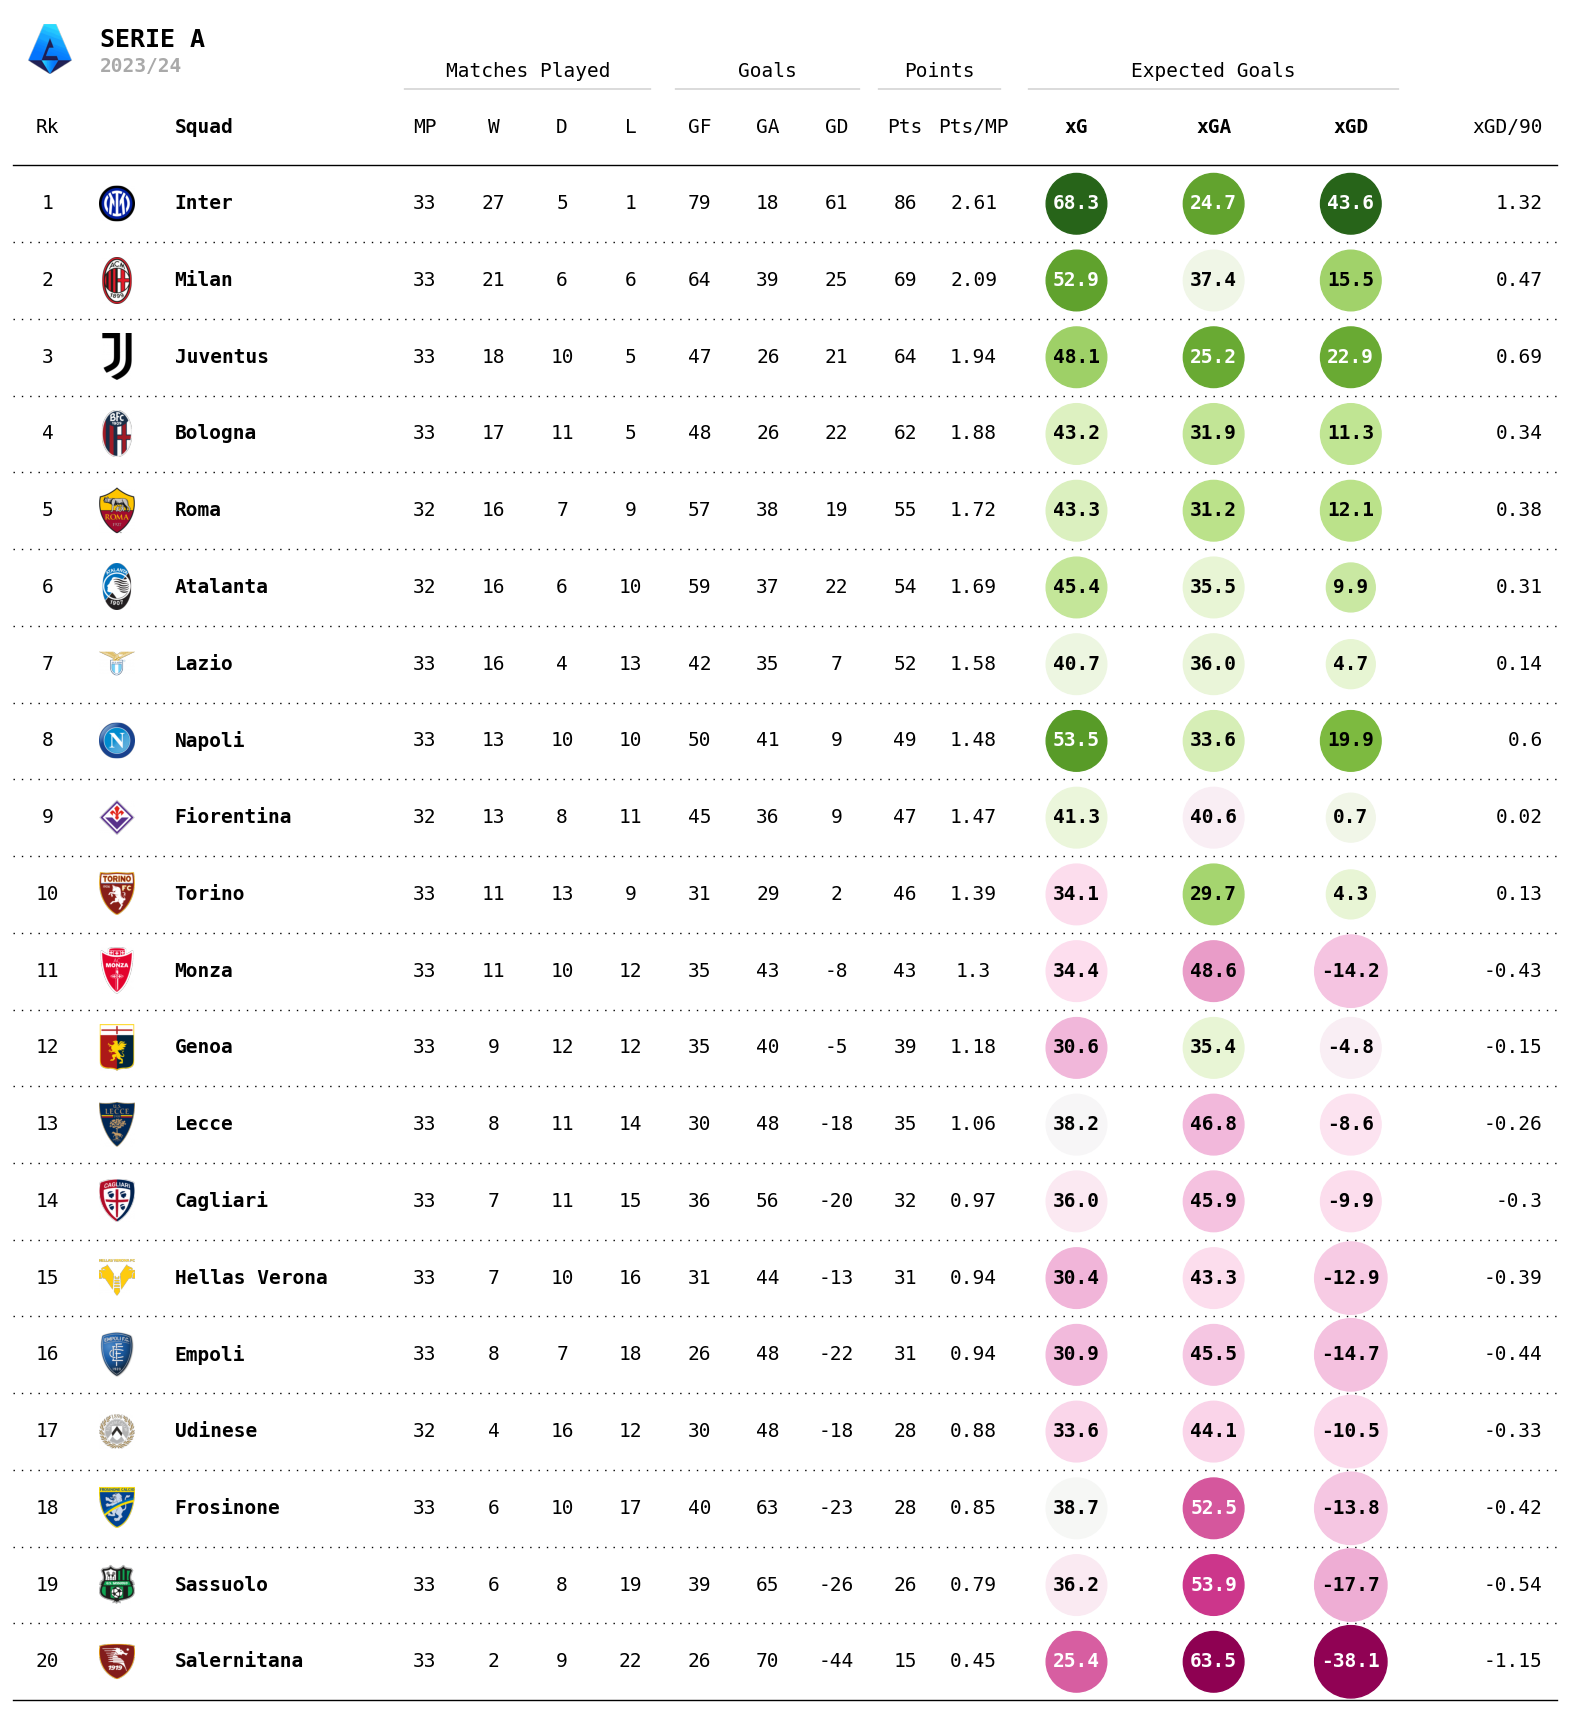

In [62]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieA,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x = 0.17, y = .872,
    s = "SERIE A\n<2023/24>",
    highlight_textprops=[
        {"color": "darkgrey", "weight": "bold", "size": 14}
    ],
    #color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/55.png"

logo_ax = fig.add_axes([0.1325, 0.85, 0.025, 0.025], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

# for idx in [0, 1, 2, 3]:
#     table.rows[idx].set_facecolor(row_colors["top4"])
#
# for idx in [4, 5]:
#     table.rows[idx].set_facecolor(row_colors["top6"])
#
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])

In [63]:
# save figure
fig.savefig("../figures/serieA_2324_MD30.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")